# Парсинг данных ?

# Предобработка данных и лиммитизация

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Загрузка необходимых ресурсов NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Чтение данных из CSV
data = pd.read_csv('global_food_wastage_dataset.csv')

# Предположим, что мы хотим обрабатывать текстовые столбцы, например, 'Страна' и 'Категория продуктов питания'
text_columns = ['Страна', 'Категория продуктов питания']

# Функция для очистки текста
def clean_text(text):
    # Удаление специальных символов и лишних пробелов
    text = re.sub(r'[^a-zA-Zа-яА-Я0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Функция для обработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Очистка текста
    text = clean_text(text)
    # Лемматизация
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('russian')]
    return ' '.join(words)

# Применение обработки к текстовым столбцам
for column in text_columns:
    data[column] = data[column].apply(preprocess_text)

# Сохранение очищенных данных в файл
data.to_csv('cleaned_data.csv', index=False)

# Векторизация
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Страна'] + ' ' + data['Категория продуктов питания'])

# Преобразование в DataFrame
vectorized_data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Сохранение векторизированных данных в файл
vectorized_data.to_csv('vectorized_data.csv', index=False)

# Вывод результатов
print("Очищенные данные сохранены в 'cleaned_data.csv'")
print("Векторизированные данные сохранены в 'vectorized_data.csv'")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yegor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yegor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Очищенные данные сохранены в 'cleaned_data.csv'
Векторизированные данные сохранены в 'vectorized_data.csv'


# Определение тенденций в диапазоне 8 лет

         Страна   год Категория продуктов питания  \
0     Australia  2019         Fruits & Vegetables   
1     Indonesia  2019               Prepared Food   
2       Germany  2022              Dairy Products   
3        France  2023         Fruits & Vegetables   
4        France  2023                   Beverages   
...         ...   ...                         ...   
4995     France  2021                   Beverages   
4996  Australia  2021                   Beverages   
4997      China  2018              Meat & Seafood   
4998  Australia  2021                   Beverages   
4999     France  2024                Bakery Items   

      Общее_количество_отходов_(тонн)  Экономический ущерб (Млн долларов)  \
0                            19268.63                            18686.68   
1                             3916.97                             4394.48   
2                             9700.16                             8909.16   
3                            46299.69                  

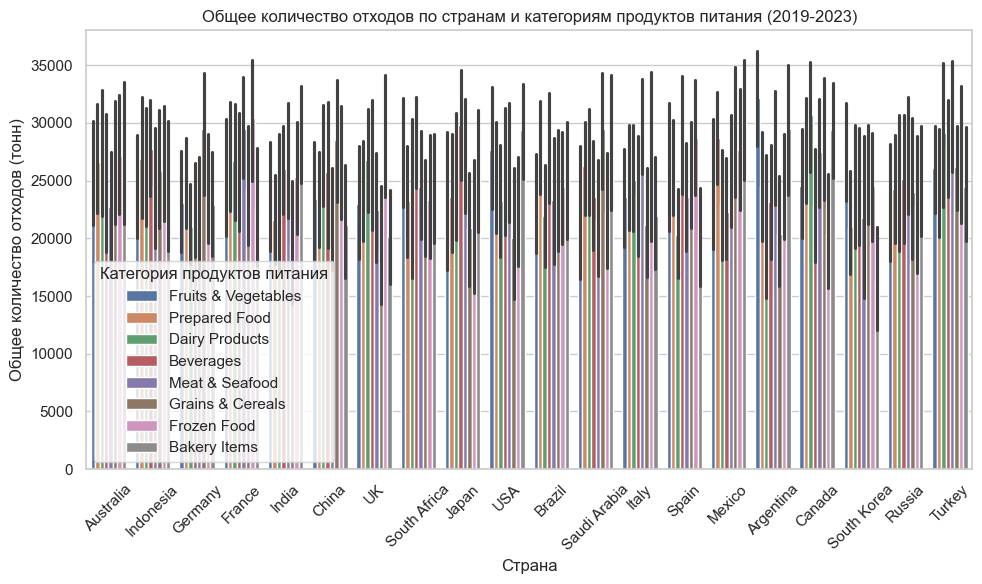

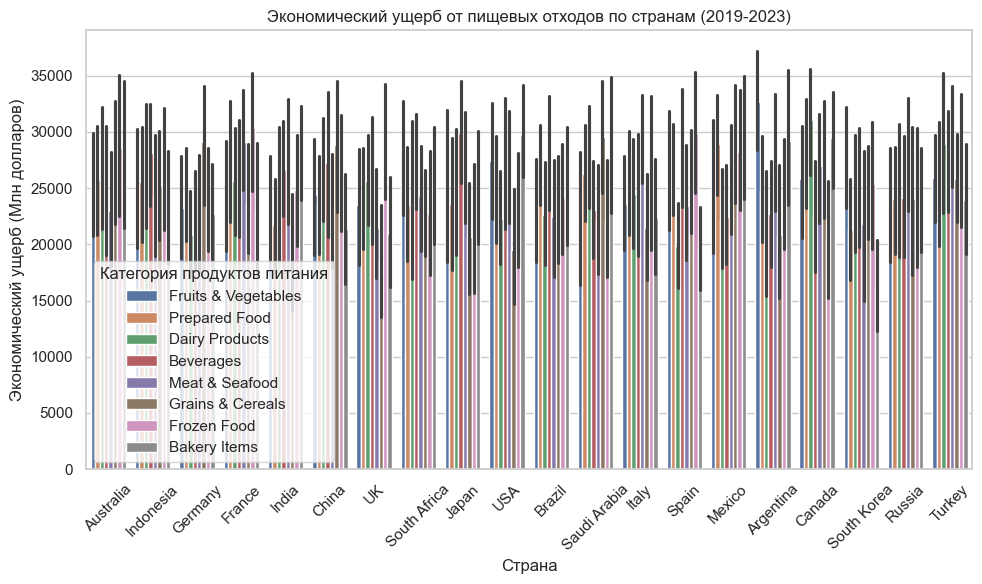

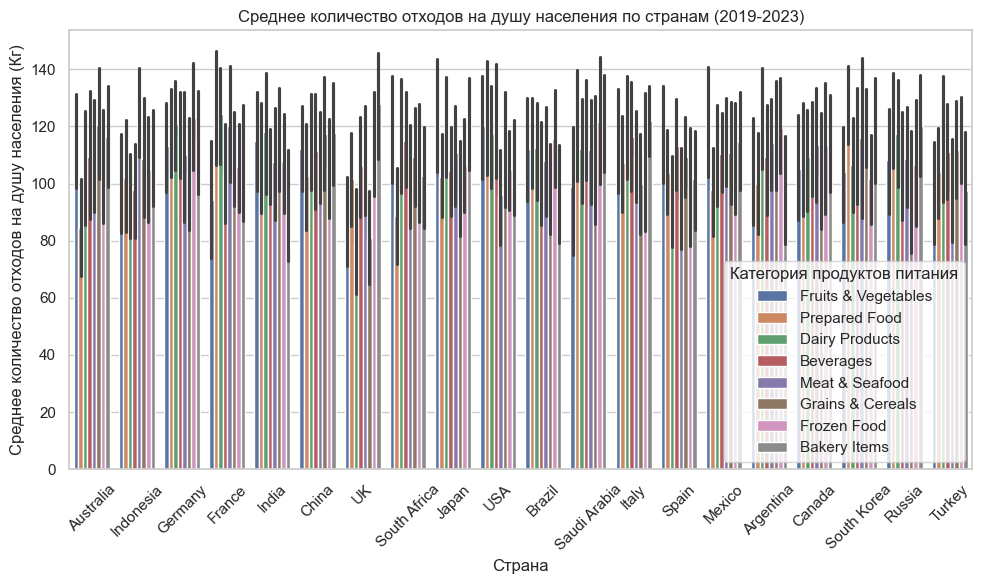

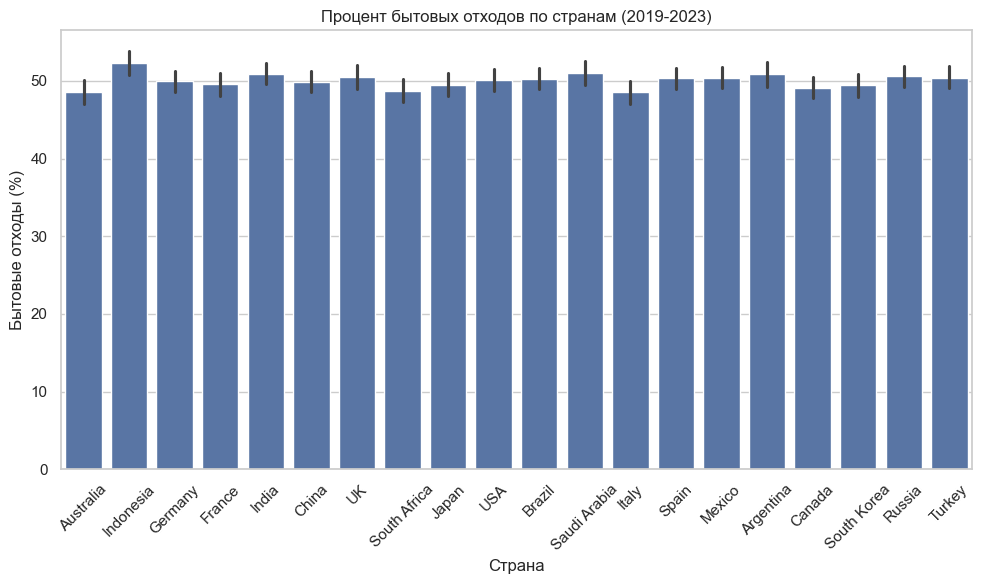

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
data = pd.read_csv('global_food_wastage_dataset.csv')

# Убедитесь, что данные загружены правильно
print(data)

# Установка стиля графиков
sns.set(style="whitegrid")

# 1. График общего количества отходов по странам
plt.figure(figsize=(10, 6))
sns.barplot(x='Страна', y='Общее_количество_отходов_(тонн)', hue='Категория продуктов питания', data=data)
plt.title('Общее количество отходов по странам и категориям продуктов питания (2019-2023)')
plt.xlabel('Страна')
plt.ylabel('Общее количество отходов (тонн)')
plt.xticks(rotation=45)
plt.legend(title='Категория продуктов питания')
plt.tight_layout()
plt.show()

# 2. График экономического ущерба по странам
plt.figure(figsize=(10, 6))
sns.barplot(x='Страна', y='Экономический ущерб (Млн долларов)', hue='Категория продуктов питания', data=data)
plt.title('Экономический ущерб от пищевых отходов по странам (2019-2023)')
plt.xlabel('Страна')
plt.ylabel('Экономический ущерб (Млн долларов)')
plt.xticks(rotation=45)
plt.legend(title='Категория продуктов питания')
plt.tight_layout()
plt.show()

# 3. График среднего количества отходов на душу населения
plt.figure(figsize=(10, 6))
sns.barplot(x='Страна', y='Среднее количество отходов на душу населения (Кг)', hue='Категория продуктов питания', data=data)
plt.title('Среднее количество отходов на душу населения по странам (2019-2023)')
plt.xlabel('Страна')
plt.ylabel('Среднее количество отходов на душу населения (Кг)')
plt.xticks(rotation=45)
plt.legend(title='Категория продуктов питания')
plt.tight_layout()
plt.show()

# 4. График процентного соотношения бытовых отходов
plt.figure(figsize=(10, 6))
sns.barplot(x='Страна', y='Бытовые отходы (%)', data=data)
plt.title('Процент бытовых отходов по странам (2019-2023)')
plt.xlabel('Страна')
plt.ylabel('Бытовые отходы (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()